# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [63]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

# Library to split data 
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV


In [64]:
#Loading dataset
data=pd.read_csv("./csvfiles/EasyVisa.csv")

In [65]:
# copying data to another variable to avoid any changes to original data
visa = data.copy()

## Data Overview

- Observations
- Sanity checks

###### View the first 5 rows of the dataset.

In [11]:
visa.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


###### View the last 5 rows of the dataset

In [12]:
visa.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


###### shape of the dataset

In [13]:
visa.shape

(25480, 12)

###### Check data types and number of non-null values for each column.

In [14]:
visa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


There are 25480 rows and 11 columns in the data set
There are no missing values in the data set. This can be verified by isna() method
Number of employees, years of establishment & prevailing wages are of type integer or float. All other attributes are of object type and will need to be converted to the right datatype

In [15]:
visa.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

There are no missing values in the dataset

In [16]:
visa.nunique()

case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

In [29]:
cols = visa.select_dtypes(['object'])
cols.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [30]:
for i in cols.columns:
    visa[i] = visa[i].astype('category')

In [31]:
visa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


# Summary of dataset

In [32]:
visa.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


The average number of employees 5667 while the median number of employees  are 2109. This implies a right skewed distribution with several positive outliers. 
There are companies in the dataset with years  from 1800 to 2016.
The average prevailing wage for occupation  is USD 74,455 while the median  is USD 70,308. This indicates, slight right skewness in the data set. 
The minimum value of USD 2.1367 does not appear to be a valid data point. 

In [33]:
visa.describe(include=['category']).T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


The case ID attribute can be dropped as it is a unique ID.
There are 6 continents in the database, with majority of applicants from Asia.
There are 4 different levels of eduction with Bachelor's being the highest education degree for majority of applicants.
There are 5 different regions in the  region of employment, the maximum being in the NorthEast US region.
There are 4 different units of wages with yearly being the most common. 


In [66]:
visa.drop(['case_id'],axis=1,inplace=True)

In [67]:
visa[visa.duplicated()].count()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

###### Univariate analysis

In [4]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

##### Observations on number of employees

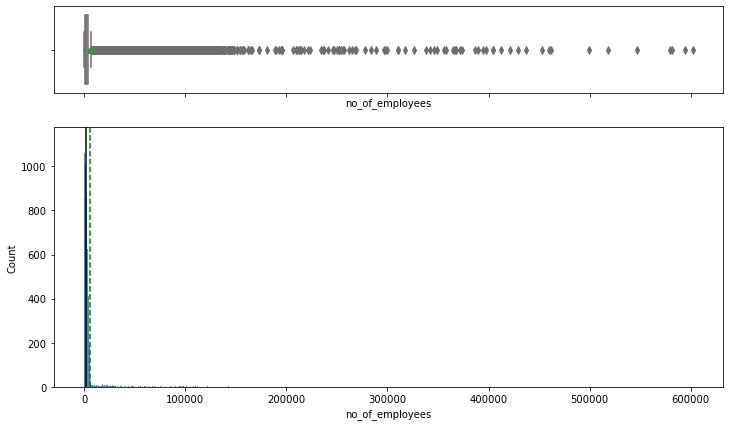

In [37]:
histogram_boxplot(visa, "no_of_employees")

The distribution for number of employees for employers is heavily skewed right

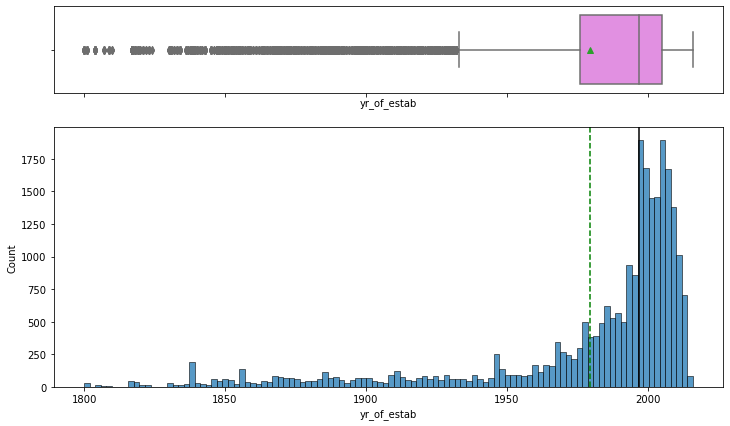

In [147]:
#Observations on year_of_establishment
histogram_boxplot(data, "yr_of_estab")

The distribution for year established is skewed left

##### Observations on prevailing wage

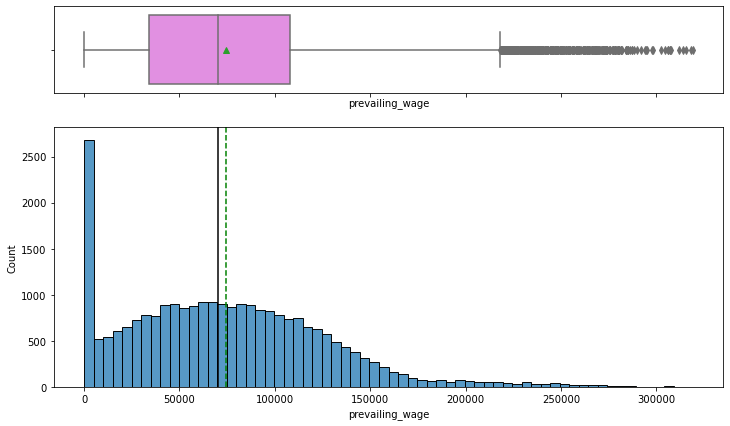

In [38]:
histogram_boxplot(visa, "prevailing_wage")

In [39]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

##### Observations on continent

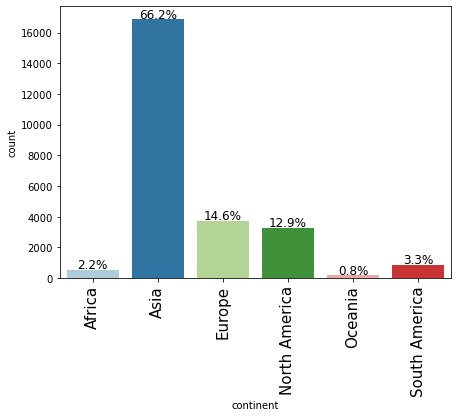

In [40]:
labeled_barplot(visa, "continent", perc=True)

##### Observations on education of employee

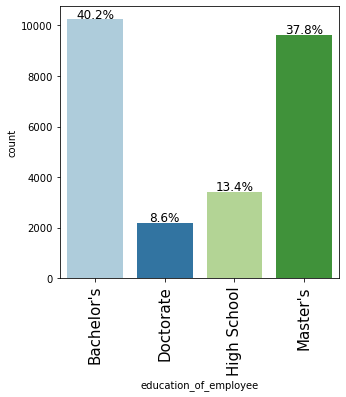

In [41]:
labeled_barplot(visa, "education_of_employee", perc=True)

##### Observations on job experience

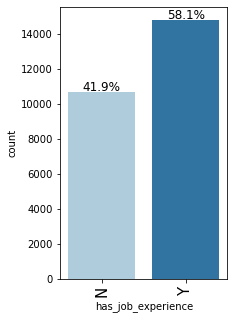

In [42]:
labeled_barplot(visa, "has_job_experience", perc=True)

##### Observations on job training

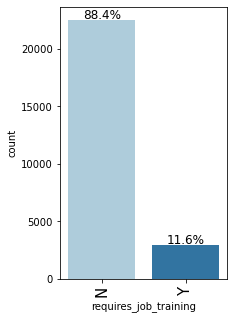

In [43]:
labeled_barplot(visa, "requires_job_training", perc=True)

##### Observations on region of employment

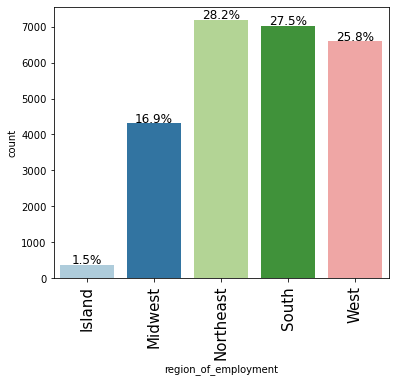

In [44]:
labeled_barplot(visa, "region_of_employment", perc=True)

##### Observations on unit of wage

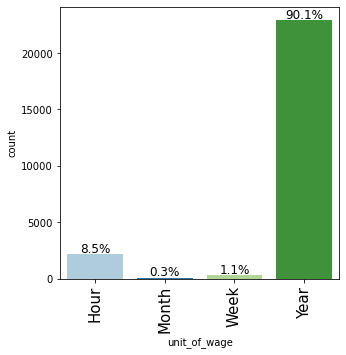

In [45]:
labeled_barplot(visa, "unit_of_wage", perc=True)

Almost 90% of all entries are with unit_of_wage as yearly and only 8.5% entries as hourly. Negligible entries are on a monthly and weekly basis.

##### Observations on case status

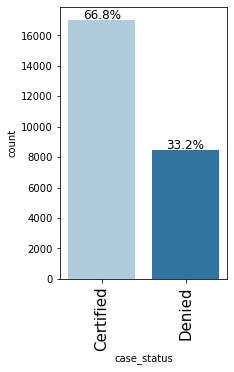

In [46]:
labeled_barplot(visa, "case_status", perc=True)

# Bivariate analysis

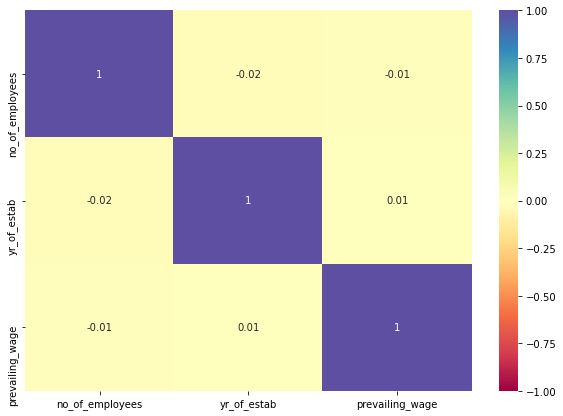

In [47]:
plt.figure(figsize=(10,7))
sns.heatmap(visa.corr(),annot=True,vmin=-1,vmax=1,fmt='.1g',cmap="Spectral")
plt.show()

In [48]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [49]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

###### Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


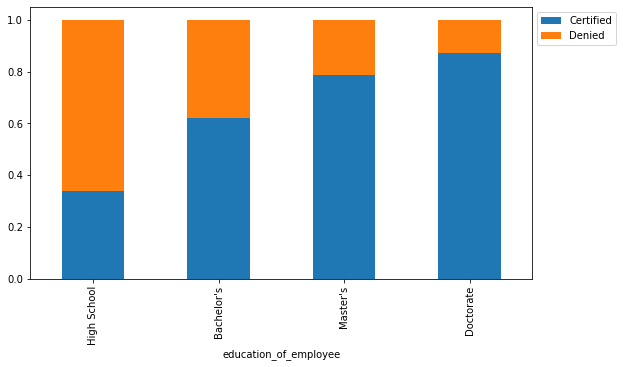

In [50]:
stacked_barplot(visa, "education_of_employee", "case_status")

###### percentage of visa certifications across each region

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


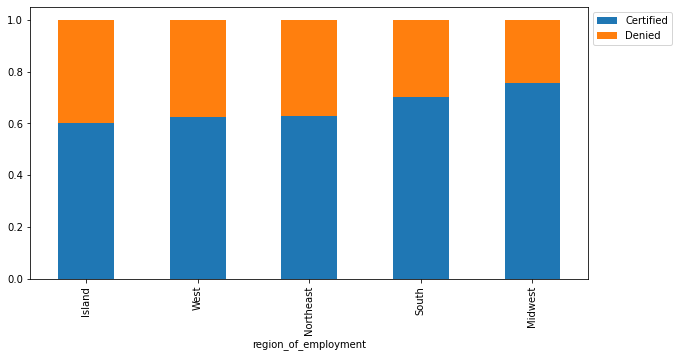

In [51]:
stacked_barplot(visa, "region_of_employment", "case_status")

###### visa status vary across different continents.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


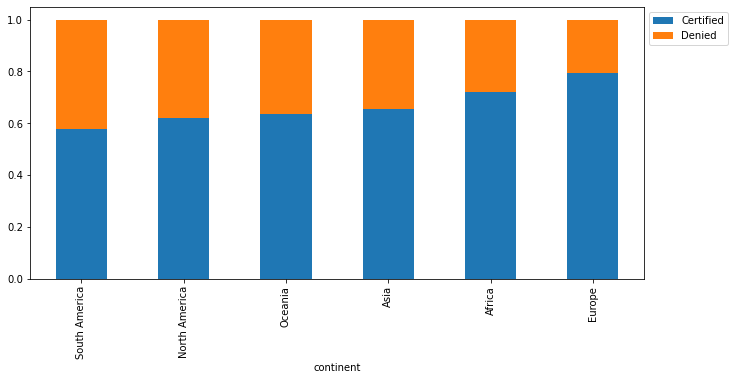

In [52]:
stacked_barplot(visa, "continent", "case_status")

###### experience has any influence over visa certification

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


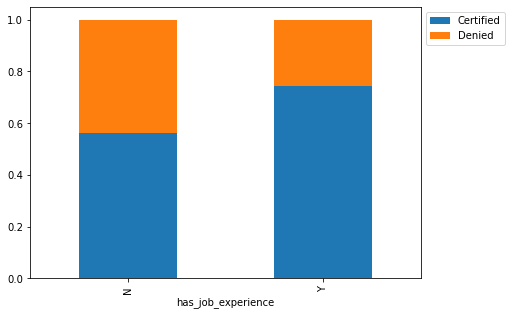

In [53]:
stacked_barplot(visa, "has_job_experience", "case_status")

###### employees who have prior work experience require any job training

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


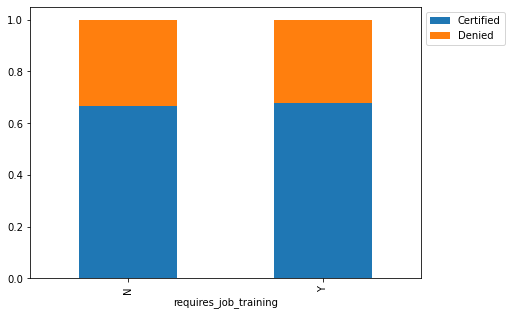

In [54]:
stacked_barplot(visa, "requires_job_training", "case_status")

###### visa status changes with the prevailing wage

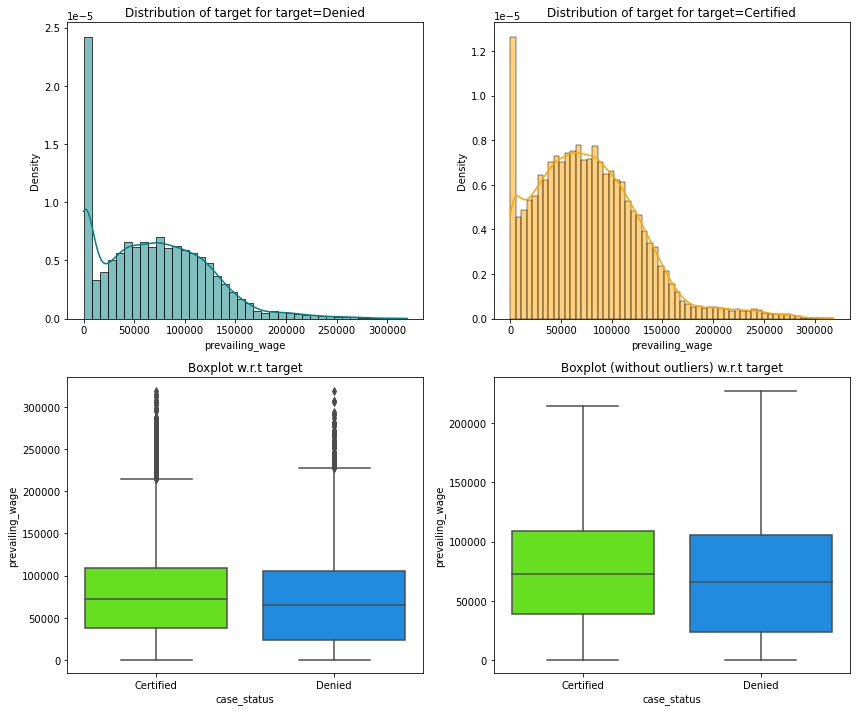

In [57]:
distribution_plot_wrt_target(visa, "prevailing_wage", "case_status")

###### impact on visa applications getting certified.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


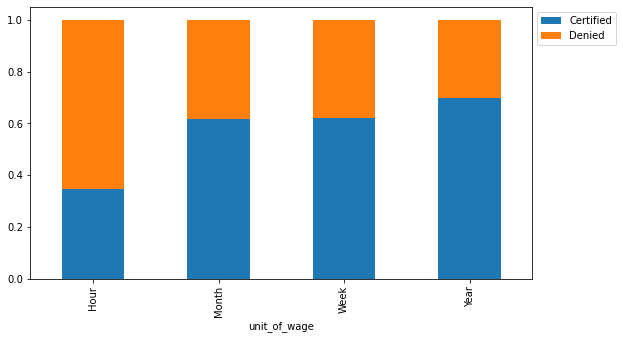

In [58]:
stacked_barplot(visa, "unit_of_wage", "case_status")

# Data preprocessing

In [59]:
visa["no_of_employees"] = pd.cut( visa["no_of_employees"], \
                                  [0, 2500, 7500, np.inf], \
                                  labels = ["Small_Sized(<2500employees)", \
                                            "Medium_Sized(2500-7500employees)", \
                                            "Large_Sized(>75000employees)"])
visa["no_of_employees"] = visa["no_of_employees"].astype("category")

case_status                       Certified  Denied    All
no_of_employees                                           
All                                   17001    8446  25447
Small_Sized(<2500employees)            9674    5084  14758
Medium_Sized(2500-7500employees)       6272    2874   9146
Large_Sized(>75000employees)           1055     488   1543
------------------------------------------------------------------------------------------------------------------------


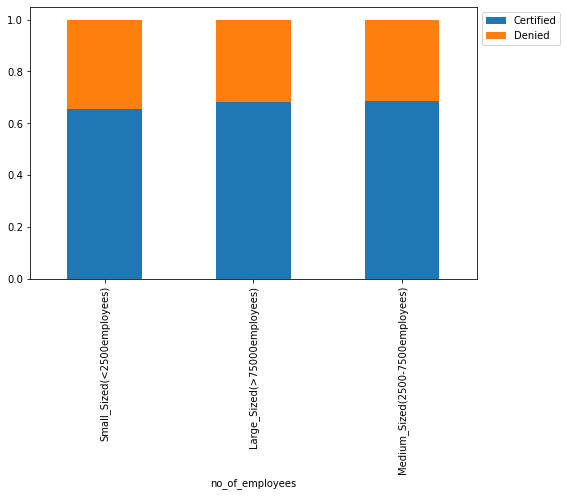

In [63]:
stacked_barplot(visa, "no_of_employees", "case_status")

# Summary of EDA

Both these attriibutes are heavily skewed, the no_of_employees is skewed right but yr_of_estab is skewed left
From the EDA, we infer 58% of all cases were for smaller organizations.
From the EDA, few cases were for unit_of_wage Hourly and the remaining  of all cases were for unit_of_wage not Hourly.
Majority of cases are from applicants in Asia , then Europe , N.America  & S.America ; however, cases getting certified is highest for Europe , then Africa , then Asia and least for S.America & N.America.
Majority of applicants have a bachelor's  or a master's degree . 
A small number have only high school certification or are very highly educated. 
However, cases getting certified is highest for doctorate degree ,followed by master degree , then bachelor's . The cases getting certified is very low for those applicants with only a high school certification.  
The cases getting certified is high for applicants with prior job experience and low for applicants without prior job experience . 
Majority of the applications are to Northeast , then South , then West , Midwest  and least to Island  regions of the US. However, the cases certified follows the trend Midwest , then South , then Northeast, West, & Island .
Majority of the jobs are full time rather than part time.

# Split the dataset

In [68]:
visa["case_status"] = visa["case_status"].apply(lambda x: 0 if x == "Denied" else 1)

In [79]:
#Separating features and the target column
X = visa.drop("case_status", axis=1)
Y = visa["case_status"]

In [80]:
X = pd.get_dummies(X, drop_first=True)

In [81]:
#Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=Y)

In [82]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


In [83]:
y.value_counts(1)

1    0.667896
0    0.332104
Name: case_status, dtype: float64

In [84]:
y_train.value_counts(1)

1    0.667919
0    0.332081
Name: case_status, dtype: float64

In [85]:
y_test.value_counts(1)

1    0.667844
0    0.332156
Name: case_status, dtype: float64

Stratify has maintained the distribution of classes when splitting to a train and test dataset

# Model evaluation criterion

###### Model can make wrong predictions as:

Certifying a case when the required criteria are not met
Denying a case when the required criteria are met


###### Which case is more important?

If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy.

###### How to reduce the losses?

F1 Score can be used a the metric for evaluation of the model, greater the F1 score higher are the chances of minimizing False Negatives and False Positives.
We will use balanced class weights so that model focuses equally on both classes.

###### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.¶

The model_performance_classification_sklearn function will be used to check the model performance of models.
The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [143]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [144]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Decision Tree Classifier

In [145]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)



DecisionTreeClassifier(random_state=1)

In [146]:
#Calculating different metrics
dtree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",dtree_model_train_perf)
dtree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",dtree_model_test_perf)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.664443  0.742605   0.751884  0.747216


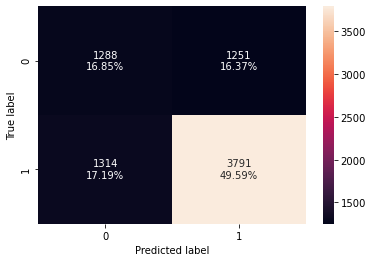

In [93]:
#Creating confusion matrix
confusion_matrix_sklearn(d_tree, X_test, y_test)

###### Decision Tree - Hyperparameter tuning

In [94]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)
# Grid of parameters to choose from
parameters = {"max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.712548  0.931923   0.720067  0.812411
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.706567  0.930852   0.715447  0.809058


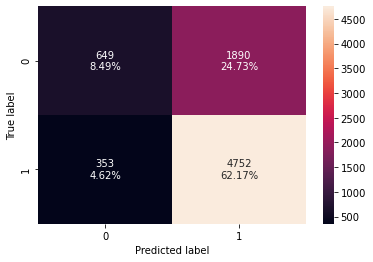

In [140]:
#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

# Random Forest

In [98]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1,class_weight='balanced')
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

In [99]:
#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.999944  0.999916        1.0  0.999958
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.719911  0.838002   0.765021  0.79985


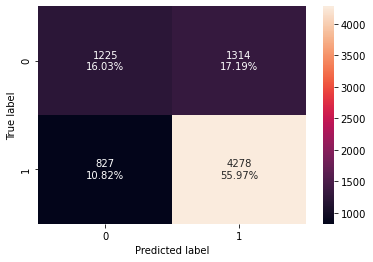

In [100]:
#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

# Random Forest - Hyperparameter tuning

In [101]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(random_state=1,oob_score=True,bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=7,
                       n_estimators=20, oob_score=True, random_state=1)

In [102]:
#### Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)



Training performance:
    Accuracy    Recall  Precision        F1
0  0.767493  0.920675    0.77403  0.841008
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.737964  0.902449   0.753763  0.821432


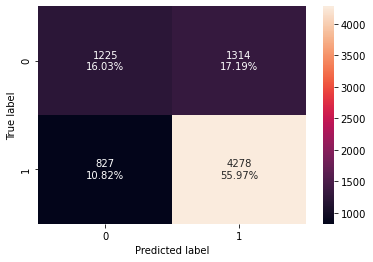

In [104]:
#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

## Building bagging and boosting models

##### Bagging Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.985367  0.986317   0.991729  0.989016
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.692177  0.766112     0.7714  0.768747


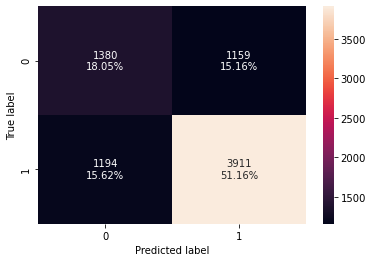

In [105]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print("Training performance:\n", bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print("Testing performance:\n", bagging_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

###### Bagging - Hyperparameter Tuning

In [106]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 111, 10),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=110,
                  random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.995851  0.999916   0.993909  0.996904
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.726975  0.897356   0.745605  0.814472


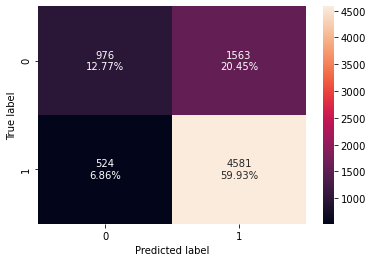

In [107]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print("Training performance:\n", bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print("Testing performance:\n", bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

# AdaBoost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.738058  0.887434   0.760411  0.819027
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.732993  0.885015    0.75653  0.815744


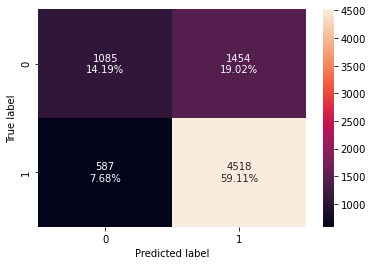

In [108]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print("Training performance:\n", ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print("Testing performance:\n", ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

###### AdaBoost - Hyperparamter tuning

In [109]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.718995  0.781247   0.794587  0.787861
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.71651  0.781391   0.791468  0.786397


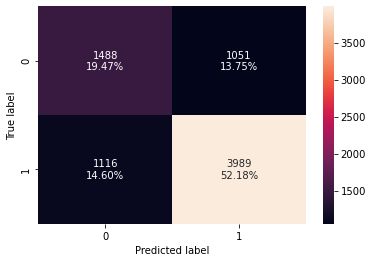

In [110]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print("Training performance:\n", abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print("Testing performance:\n", abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

# Gradient Boosting Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.759419  0.882901   0.784106  0.830576
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.744636  0.873262   0.773555  0.82039


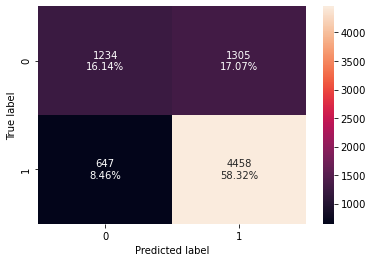

In [111]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

###### Gradient Boosting - Hyperparameter Tuning

In [122]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,175,250],
    "subsample":[0.8,1],
    "max_features":[0.8,0.9,1]
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, random_state=1, subsample=0.8)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.758298  0.882481    0.78315  0.829854
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.743721  0.874241   0.772145  0.820028


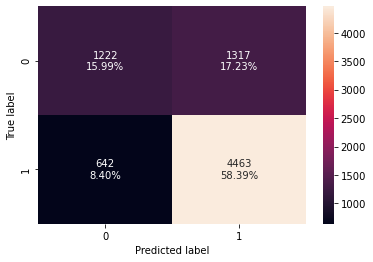

In [123]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

# XGBoost Classifier

Training performance:
    Accuracy  Recall  Precision        F1
0  0.838248   0.931   0.843166  0.884908
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.735348  0.863271   0.768842  0.813325


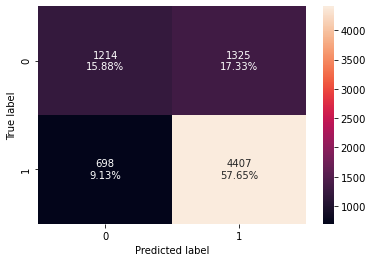

In [124]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

###### XGBoost - Hyperparameter tuning

In [131]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
}    
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.7, tree_method='exact',
              validate_parameters=1, verbosity=None)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.766035  0.884832   0.790061  0.834765
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.745814  0.872674   0.775052  0.820971


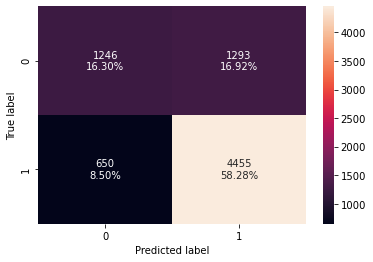

In [132]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

# Stacking Classifier

In [133]:
estimators = [('Ad Boost Tuned',abc_tuned), ('Gradient Boost Tuned',gbc_tuned), ('Decision Tree Tuned',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Ad Boost Tuned',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                         max_depth=1,
                                                                                         random_state=1),
                                                   learning_rate=0.1,
                                                   n_estimators=100,
                                                   random_state=1)),
                               ('Gradient Boost Tuned',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           random_state=1,
                                                           subsample=0.8)),
                               ('Dec

Training performance:
    Accuracy    Recall  Precision        F1
0  0.757961  0.879459   0.784324  0.829172
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.743459  0.871303   0.773296  0.819379


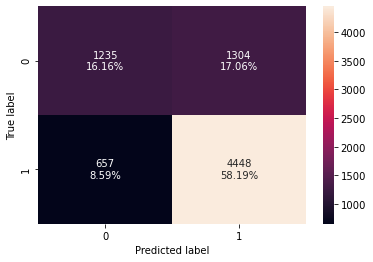

In [134]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)


# Comparing all models

In [142]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.706567,0.719911,0.737964,0.692177,0.726975,0.732993,0.716510,0.744636,0.743721,0.735348,0.745814,0.743459
Recall,1.0,0.930852,0.838002,0.902449,0.766112,0.897356,0.885015,0.781391,0.873262,0.874241,0.863271,0.872674,0.871303
Precision,1.0,0.715447,0.765021,0.753763,0.771400,0.745605,0.756530,0.791468,0.773555,0.772145,0.768842,0.775052,0.773296
F1,1.0,0.809058,0.799850,0.821432,0.768747,0.814472,0.815744,0.786397,0.820390,0.820028,0.813325,0.820971,0.819379


In [141]:
# training performance comparison

models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T,stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.712548,0.999944,0.767493,0.985367,0.995851,0.738058,0.718995,0.759419,0.758298,0.838248,0.766035,0.757961
Recall,1.0,0.931923,0.999916,0.920675,0.986317,0.999916,0.887434,0.781247,0.882901,0.882481,0.931000,0.884832,0.879459
Precision,1.0,0.720067,1.000000,0.774030,0.991729,0.993909,0.760411,0.794587,0.784106,0.783150,0.843166,0.790061,0.784324
F1,1.0,0.812411,0.999958,0.841008,0.989016,0.996904,0.819027,0.787861,0.830576,0.829854,0.884908,0.834765,0.829172


# Feature importance of XGBoost Hyperparameter Tuned Model

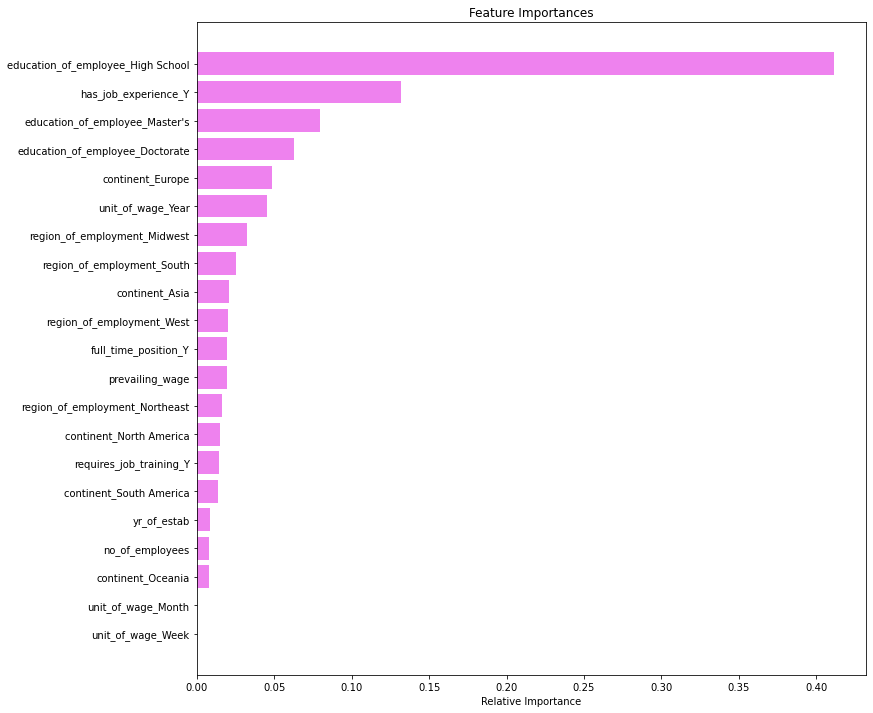

In [137]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Actionable Insights and Recommendations

###### Based on the EDA and the XGBoost(tuned) model, the following features were identified as important for visas getting certified than denied
Education of employee ; an employee with only a high school certififcation has  chance of visa getting denied in comparison to an employee with a doctorate degree with  chance of visa getting certified.
 Unit of wage ; an employee with an hourly pay likewise has  chance of visa getting denied in comparison to an employee with a non-hourly pay (week-ly, month-ly or year-ly) with a chance of visa getting certified.
The continent the employee is from (e.g., if Europe, has a chance of visa getting certified), if the employee has prior job experience.
 the region of the US the employment opportunity is in is also an important deciding factor with getting certified if the region is Midwest or South.
Year of establishment of the employer or the number of employees in the organization are not important attributes 
The XGBoost hyperparameter tuned ML model is able to give generalized prediction on training & testing datasets  and is able to explain overall information .
The precision & recall are likewise both high.
The confusion matrix is able to identify a higher % of cases getting certified, but only a smaller % of cases getting denied correctly. 
reevaluation of cases getting denied can be carried out in case there is a a prevailing human resource shortage in the US.